In [1]:
import numpy as np
import pandas as pd

In [55]:
df_gases_1 = pd.read_pickle("./data_gases_1.pkl")
df_gases_2 = pd.read_pickle("./data_gases_2.pkl")

In [3]:
df_gases_1.head(1)

,C,Um,Ur,Ud,C_target
0,84.065575,0.70109,0.70087,0.77666,0.0


In [7]:
def get_left_right_border(df, border_param):
    df_gases_grouped = df.groupby('C_target')
    quar_1 = df_gases_grouped[border_param].quantile(0.25)
    quar_3 = df_gases_grouped[border_param].quantile(0.75)
    inter_quar = {perc: (quar_3.get(perc) - quar_1.get(perc)) for perc in quar_1.keys()} 
    left_right_border = {perc: (quar_1.get(perc) - 1.5*inter_quar.get(perc),
                            quar_3.get(perc) + 1.5*inter_quar.get(perc)) for perc in quar_1.keys()}
    return left_right_border

In [56]:
left_right_border_gases_1 = get_left_right_border(df_gases_1, 'Um')
left_right_border_gases_2 = get_left_right_border(df_gases_2, 'Um')

In [10]:
def filter_outliers(df, left_right_border, border_param):
    df_filtered = df.copy()
    for target in left_right_border.keys():
        df_filtered.drop(df_filtered[(df_filtered['C_target'] == target) &
                                   ((df_filtered[border_param] < left_right_border.get(target)[0]) |
                                    (df_filtered[border_param] > left_right_border.get(target)[1]))].index, inplace=True) 
    return df_filtered

In [57]:
df_gases_1_filtered = filter_outliers(df_gases_1, left_right_border_gases_1, 'Um')
df_gases_2_filtered = filter_outliers(df_gases_2, left_right_border_gases_2, 'Um')

In [42]:
df_gases_1.shape[0]

2466

In [44]:
df_gases_2.shape[0]

2299

In [41]:
(df_gases_1.shape[0] - df_gases_1_filtered.shape[0])*100/df_gases_1.shape[0]

7.948094079480941

In [43]:
(df_gases_2.shape[0] - df_gases_2_filtered.shape[0])*100/df_gases_2.shape[0]

7.220530665506742

In [21]:
zero_perc = df_gases_2_filtered.loc[df_gases_2_filtered['C_target'] == 0.0]

In [22]:
zero_perc.describe()

,C,Um,Ur,Ud,C_target
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.0
mean,-42.141300,0.696594,0.693141,0.775236,0.0
std,383.699927,0.002652,0.003715,0.000631,0.0
min,-503.683777,0.686650,0.686310,0.774200,0.0
25%,-178.866005,0.693660,0.688250,0.774420,0.0
50%,-98.838531,0.697550,0.694340,0.775370,0.0
75%,-19.778910,0.698120,0.695290,0.775660,0.0
max,3759.278076,0.702110,0.700860,0.776670,0.0


In [23]:
from scipy import stats

In [25]:
k2, p = stats.normaltest(zero_perc['C'].to_numpy())
p

4.283597751299059e-250

In [26]:
import seaborn as sns

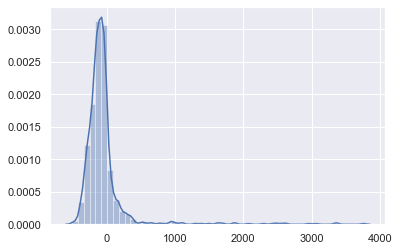

In [27]:
sns.set()
ax = sns.distplot(zero_perc['C'].to_numpy())

In [58]:
df_gases_2_filtered_on_C = filter_outliers(df_gases_2, get_left_right_border(df_gases_2, 'C'), 'C')

In [48]:
(df_gases_2.shape[0] - df_gases_2_filtered_on_C.shape[0])*100/df_gases_2.shape[0]

11.43975641583297

In [31]:
zero_perc_on_C = df_gases_2_filtered_on_C.loc[df_gases_2_filtered_on_C['C_target'] == 0.0]
zero_perc_on_C.describe()

,C,Um,Ur,Ud,C_target
count,944.000000,944.000000,944.000000,944.000000,944.0
mean,-110.472104,0.696840,0.693339,0.775264,0.0
std,119.465875,0.002306,0.003528,0.000607,0.0
min,-418.312286,0.691850,0.686990,0.774200,0.0
25%,-185.449272,0.696450,0.692847,0.775097,0.0
50%,-107.936333,0.697590,0.694390,0.775380,0.0
75%,-33.764821,0.698120,0.695290,0.775660,0.0
max,233.150726,0.702110,0.700860,0.776670,0.0


In [32]:
k2, p = stats.normaltest(zero_perc_on_C['C'].to_numpy())
p

0.5117262800024963

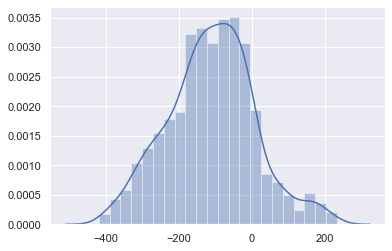

In [33]:
sns.set()
ax = sns.distplot(zero_perc_on_C['C'].to_numpy())

In [49]:
df_all_night = pd.read_pickle("./data_all_night.pkl")

In [53]:
df_all_night.shape

(11326, 5)

In [52]:
k2, p = stats.normaltest(df_all_night['C'].to_numpy())
p

1.112674014495594e-283

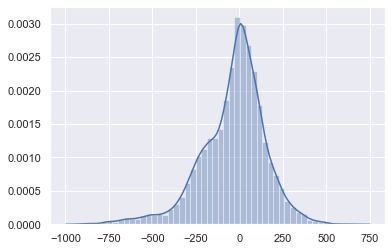

In [51]:
sns.set()
ax = sns.distplot(df_all_night['C'].to_numpy())

In [59]:
df_gases_1_filtered.to_pickle(f"./data_gases_1_filtered.pkl")
df_gases_2_filtered_on_C.to_pickle(f"./data_gases_2_filtered.pkl")